In [1]:
from __future__ import print_function

import numpy as np
import yt
import unyt
from yt.units import *
from yt import YTArray
import argparse
import os
import glob
import sys
from astropy.table import Table
from astropy.io import ascii
import matplotlib.pyplot as plt
import random
from scipy import interpolate
#from photutils import detect_threshold, detect_sources, source_properties, EllipticalAperture
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
from scipy.optimize import minimize
import trident
import ast
#import emcee
import numpy.random as rn
from multiprocessing import Pool
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from yt.units import kpc, cm
import cmasher as cmr

# These imports are FOGGIE-specific files
from foggie.utils.consistency import *
from foggie.utils.get_refine_box import get_refine_box
from foggie.utils.get_halo_center import get_halo_center
from foggie.utils.get_proper_box_size import get_proper_box_size
from foggie.utils.get_run_loc_etc import get_run_loc_etc
from foggie.utils.yt_fields import *
from foggie.utils.foggie_load import *
from foggie.utils.analysis_utils import *

# These imports for datashader plots
import datashader as dshader
from datashader.utils import export_image
import datashader.transfer_functions as tf
import pandas as pd
import matplotlib as mpl
import h5py
import matplotlib.cm as mtcm
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D

from foggie.clumps.clump_finder.utils_diskproject import load_disk 
from collections import defaultdict
import pandas as pd
import math
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


from foggie.clumps.clump_finder.utils_clump_finder import *
from foggie.clumps.clump_finder.clump_finder_argparser import *
from foggie.clumps.clump_finder.fill_topology import *
from foggie.clumps.clump_finder.clump_load import *
from foggie.clumps.clump_finder.clump_finder import clump_finder



In [2]:
def generate_foggie_paths(halo, run, snap):
    # Define base paths
    foggie_base_dir = "/Users/vidasaeedzadeh/Projects/foggie_data/"
    code_base_path = "/Users/vidasaeedzadeh/Projects/repositories/foggie/foggie/"
    output_base_dir = "/Users/vidasaeedzadeh/Projects/foggie_outputs/"

    # Zero-pad the halo number to 6 digits
    halo_number = halo.zfill(6)

    # Define directory and file paths dynamically
    foggie_dir = os.path.join(foggie_base_dir, f"halo_{halo_number}", run + '/')
    snap_name = os.path.join(foggie_dir, snap, snap)
    halo_c_v_name = os.path.join(code_base_path, f"halo_infos/{halo_number}/{run}/halo_c_v")
    trackname = os.path.join(code_base_path, f"halo_tracks/{halo_number}/nref11n_selfshield_15/halo_track_200kpc_nref9")

    # Output directory (adjust based on needs)
    output_dir = output_base_dir

    # Return paths
    return foggie_dir,code_base_path, snap_name, halo_c_v_name, trackname, output_dir

# specify halo and snapshot

halos = ['2392','4123','5016','5036','8508']
run = 'nref11c_nref9f'#'ludicrous/nref11c_nref9f.enhance'
snap ='RD0042' 







In [28]:

for index, halo in enumerate(halos):
            
            
            foggie_dir, code_path, snap_name, halo_c_v_name, trackname, output_dir = generate_foggie_paths(halo, run, snap)
            halo_name = halo_dict[halo]
            mass_dir = code_path + '/halo_infos/00' + halo

            mass_file = os.path.join(code_path, 'halo_infos', '00' + halo,run, 'rvir_masses.hdf5')

            # Read and inspect HDF5 file
            if os.path.exists(mass_file):
                with h5py.File(mass_file, 'r') as f:
                    print(f"Keys in {mass_file}:")
                    for key in f.keys():
                        print(f"  {key}: shape = {f[key].shape}, dtype = {f[key].dtype}")
                        print(f"    sample data: {f[key][:5]}")  # print first 5 values
            else:
                print(f"File does not exist: {mass_file}")

            


            



Keys in /Users/vidasaeedzadeh/Projects/repositories/foggie/foggie/halo_infos/002392/nref11c_nref9f/rvir_masses.hdf5:
  all_data: shape = (2410,), dtype = [('redshift', '<f8'), ('snapshot', 'S6'), ('radius', '<f8'), ('total_mass', '<f8'), ('dm_mass', '<f8'), ('stars_mass', '<f8'), ('young_stars_mass', '<f8'), ('old_stars_mass', '<f8'), ('gas_mass', '<f8'), ('gas_metal_mass', '<f8'), ('gas_H_mass', '<f8'), ('gas_HI_mass', '<f8'), ('gas_HII_mass', '<f8'), ('gas_CII_mass', '<f8'), ('gas_CIII_mass', '<f8'), ('gas_CIV_mass', '<f8'), ('gas_OVI_mass', '<f8'), ('gas_OVII_mass', '<f8'), ('gas_MgII_mass', '<f8'), ('gas_SiII_mass', '<f8'), ('gas_SiIII_mass', '<f8'), ('gas_SiIV_mass', '<f8'), ('gas_NeVIII_mass', '<f8')]
    sample data: [(5.99654865, b'DD0138', 2.61360744, 2.03450316e+08, 1.78641168e+08, 0., 0., 1.78641168e+08, 24809148.40248626, 0.00248091, 10588282.95980213, 10588282.95980213,  8266669.82420194, 1.60898521e-05, 1.93698491e-05, 6.51147700e-08, 8.28609967e-16, 0., 2.02117280e-06, 2

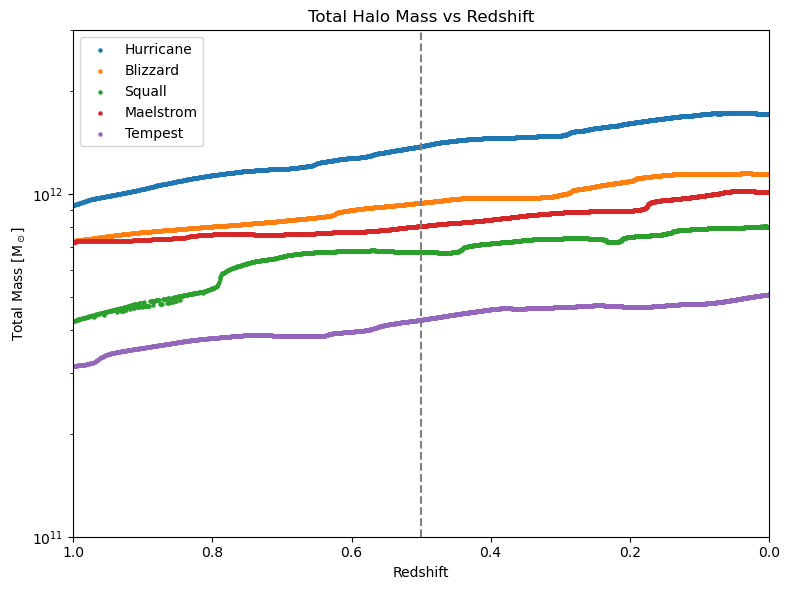

In [10]:
# Start plot
plt.figure(figsize=(8,6))

for halo in halos:
    foggie_dir, code_path, snap_name, halo_c_v_name, trackname, output_dir = generate_foggie_paths(halo, run, snap)
    halo_name = halo_dict[halo]
    mass_file = os.path.join(code_path, 'halo_infos', '00' + halo,run, 'rvir_masses.hdf5')

    if os.path.exists(mass_file):
        with h5py.File(mass_file, 'r') as f:
            data = f['all_data'][:]
            redshift = data['redshift']
            total_mass = data['total_mass']


        plt.scatter(redshift, total_mass, label=halo_name, s=5)
    else:
        print(f"Missing file for halo {halo_name}: {mass_file}")

plt.axvline(x=0.5, color = 'grey', linestyle='dashed')
plt.xlabel('Redshift')
plt.ylabel(r'Total Mass [M$_\odot$]')
plt.xlim(0,1)
plt.ylim(1e11,3e12)
plt.yscale('log')
plt.gca().invert_xaxis()  # High z on the left, low z on the right
plt.legend()
plt.title('Total Halo Mass vs Redshift')
plt.tight_layout()
plt.show()

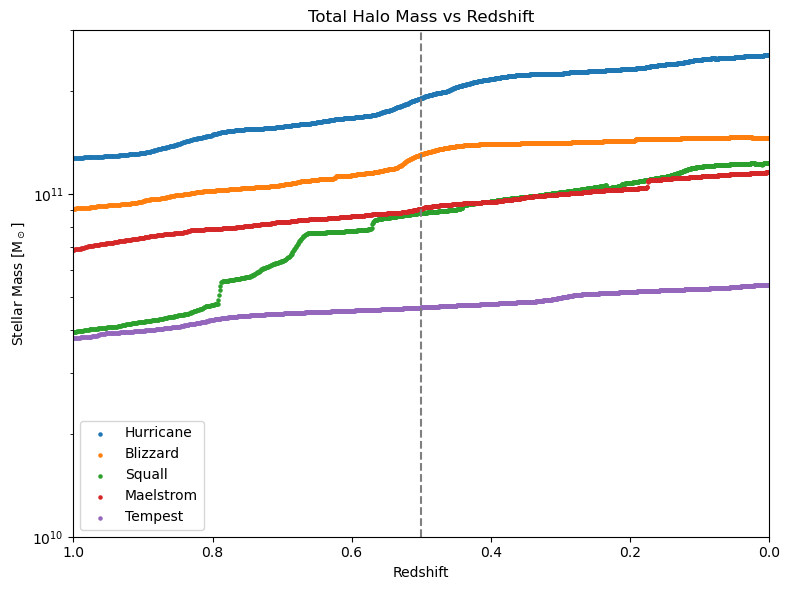

In [11]:
# Start plot
plt.figure(figsize=(8,6))

for halo in halos:
    foggie_dir, code_path, snap_name, halo_c_v_name, trackname, output_dir = generate_foggie_paths(halo, run, snap)
    halo_name = halo_dict[halo]
    mass_file = os.path.join(code_path, 'halo_infos', '00' + halo,run, 'rvir_masses.hdf5')

    if os.path.exists(mass_file):
        with h5py.File(mass_file, 'r') as f:
            data = f['all_data'][:]
            redshift = data['redshift']
            total_mass = data['stars_mass']


        plt.scatter(redshift, total_mass, label=halo_name, s=5)
    else:
        print(f"Missing file for halo {halo_name}: {mass_file}")
plt.axvline(x=0.5, color = 'grey', linestyle='dashed')
plt.xlabel('Redshift')
plt.ylabel(r'Stellar Mass [M$_\odot$]')
plt.xlim(0,1)
plt.ylim(1e10,3e11)
plt.yscale('log')
plt.gca().invert_xaxis()  # High z on the left, low z on the right
plt.legend()
plt.title('Total Halo Mass vs Redshift')
plt.tight_layout()
plt.show()

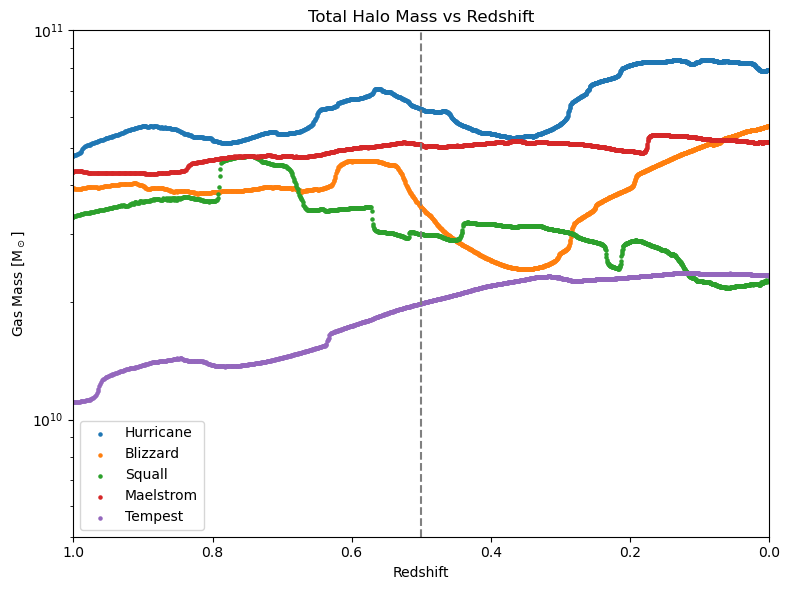

In [12]:
# Start plot
plt.figure(figsize=(8,6))

for halo in halos:
    foggie_dir, code_path, snap_name, halo_c_v_name, trackname, output_dir = generate_foggie_paths(halo, run, snap)
    halo_name = halo_dict[halo]
    mass_file = os.path.join(code_path, 'halo_infos', '00' + halo,run, 'rvir_masses.hdf5')

    if os.path.exists(mass_file):
        with h5py.File(mass_file, 'r') as f:
            data = f['all_data'][:]
            redshift = data['redshift']
            total_mass = data['gas_mass']


        plt.scatter(redshift, total_mass, label=halo_name, s=5)
    else:
        print(f"Missing file for halo {halo_name}: {mass_file}")
plt.axvline(x=0.5, color = 'grey', linestyle='dashed')
plt.xlabel('Redshift')
plt.ylabel(r'Gas Mass [M$_\odot$]')
plt.xlim(0,1)
plt.ylim(5e9,1e11)
plt.yscale('log')
plt.gca().invert_xaxis()  # High z on the left, low z on the right
plt.legend()
plt.title('Total Halo Mass vs Redshift')
plt.tight_layout()
plt.show()